In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/disease-symptoms-and-patient-profile-dataset/Disease_symptom_and_patient_profile_dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/disease-symptoms-and-patient-profile-dataset/Disease_symptom_and_patient_profile_dataset.csv')

In [3]:
df.head(10)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive
6,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
7,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
8,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative
9,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative


In [4]:
df.shape

(349, 10)

In [5]:
df.columns

Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')

In [6]:
df.rename(columns={'Difficulty Breathing':'DB','Blood Pressure':'BD','Cholesterol Level':'CL','Outcome Variable':'labels'},inplace=True)

In [7]:
df.dtypes

Disease    object
Fever      object
Cough      object
Fatigue    object
DB         object
Age         int64
Gender     object
BD         object
CL         object
labels     object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Disease  349 non-null    object
 1   Fever    349 non-null    object
 2   Cough    349 non-null    object
 3   Fatigue  349 non-null    object
 4   DB       349 non-null    object
 5   Age      349 non-null    int64 
 6   Gender   349 non-null    object
 7   BD       349 non-null    object
 8   CL       349 non-null    object
 9   labels   349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [9]:
import matplotlib.pyplot as plt

(array([ 8., 47., 88., 59., 40., 62., 23., 16.,  2.,  4.]),
 array([19. , 26.1, 33.2, 40.3, 47.4, 54.5, 61.6, 68.7, 75.8, 82.9, 90. ]),
 <BarContainer object of 10 artists>)

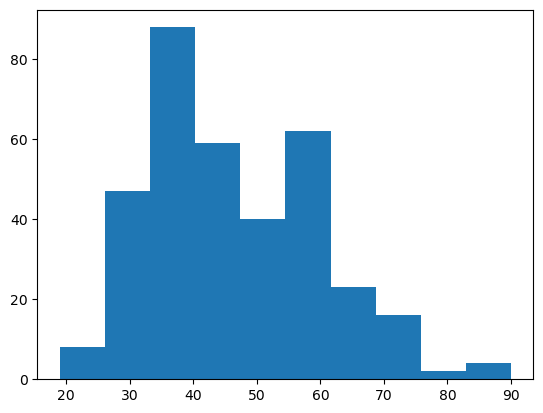

In [10]:
plt.hist(df['Age'])

In [11]:
col=df.columns

In [12]:
col

Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'DB', 'Age', 'Gender', 'BD',
       'CL', 'labels'],
      dtype='object')

In [13]:
df['Disease'].unique()

array(['Influenza', 'Common Cold', 'Eczema', 'Asthma', 'Hyperthyroidism',
       'Allergic Rhinitis', 'Anxiety Disorders', 'Diabetes',
       'Gastroenteritis', 'Pancreatitis', 'Rheumatoid Arthritis',
       'Depression', 'Liver Cancer', 'Stroke', 'Urinary Tract Infection',
       'Dengue Fever', 'Hepatitis', 'Kidney Cancer', 'Migraine',
       'Muscular Dystrophy', 'Sinusitis', 'Ulcerative Colitis',
       'Bipolar Disorder', 'Bronchitis', 'Cerebral Palsy',
       'Colorectal Cancer', 'Hypertensive Heart Disease',
       'Multiple Sclerosis', 'Myocardial Infarction (Heart...',
       'Urinary Tract Infection (UTI)', 'Osteoporosis', 'Pneumonia',
       'Atherosclerosis', 'Chronic Obstructive Pulmonary...', 'Epilepsy',
       'Hypertension', 'Obsessive-Compulsive Disorde...', 'Psoriasis',
       'Rubella', 'Cirrhosis', 'Conjunctivitis (Pink Eye)',
       'Liver Disease', 'Malaria', 'Spina Bifida', 'Kidney Disease',
       'Osteoarthritis', 'Klinefelter Syndrome', 'Acne', 'Brain Tumor',


In [14]:
print(df['Fever'].unique())

['Yes' 'No']


In [15]:
for i in col:
    print('unique value for ',i,' is : ')
    print()
    print(df[i].unique())

unique value for  Disease  is : 

['Influenza' 'Common Cold' 'Eczema' 'Asthma' 'Hyperthyroidism'
 'Allergic Rhinitis' 'Anxiety Disorders' 'Diabetes' 'Gastroenteritis'
 'Pancreatitis' 'Rheumatoid Arthritis' 'Depression' 'Liver Cancer'
 'Stroke' 'Urinary Tract Infection' 'Dengue Fever' 'Hepatitis'
 'Kidney Cancer' 'Migraine' 'Muscular Dystrophy' 'Sinusitis'
 'Ulcerative Colitis' 'Bipolar Disorder' 'Bronchitis' 'Cerebral Palsy'
 'Colorectal Cancer' 'Hypertensive Heart Disease' 'Multiple Sclerosis'
 'Myocardial Infarction (Heart...' 'Urinary Tract Infection (UTI)'
 'Osteoporosis' 'Pneumonia' 'Atherosclerosis'
 'Chronic Obstructive Pulmonary...' 'Epilepsy' 'Hypertension'
 'Obsessive-Compulsive Disorde...' 'Psoriasis' 'Rubella' 'Cirrhosis'
 'Conjunctivitis (Pink Eye)' 'Liver Disease' 'Malaria' 'Spina Bifida'
 'Kidney Disease' 'Osteoarthritis' 'Klinefelter Syndrome' 'Acne'
 'Brain Tumor' 'Cystic Fibrosis' 'Glaucoma' 'Rabies' 'Chickenpox'
 'Coronary Artery Disease' 'Eating Disorders (Anorexia,

In [16]:
df.isnull().sum()

Disease    0
Fever      0
Cough      0
Fatigue    0
DB         0
Age        0
Gender     0
BD         0
CL         0
labels     0
dtype: int64

<Axes: >

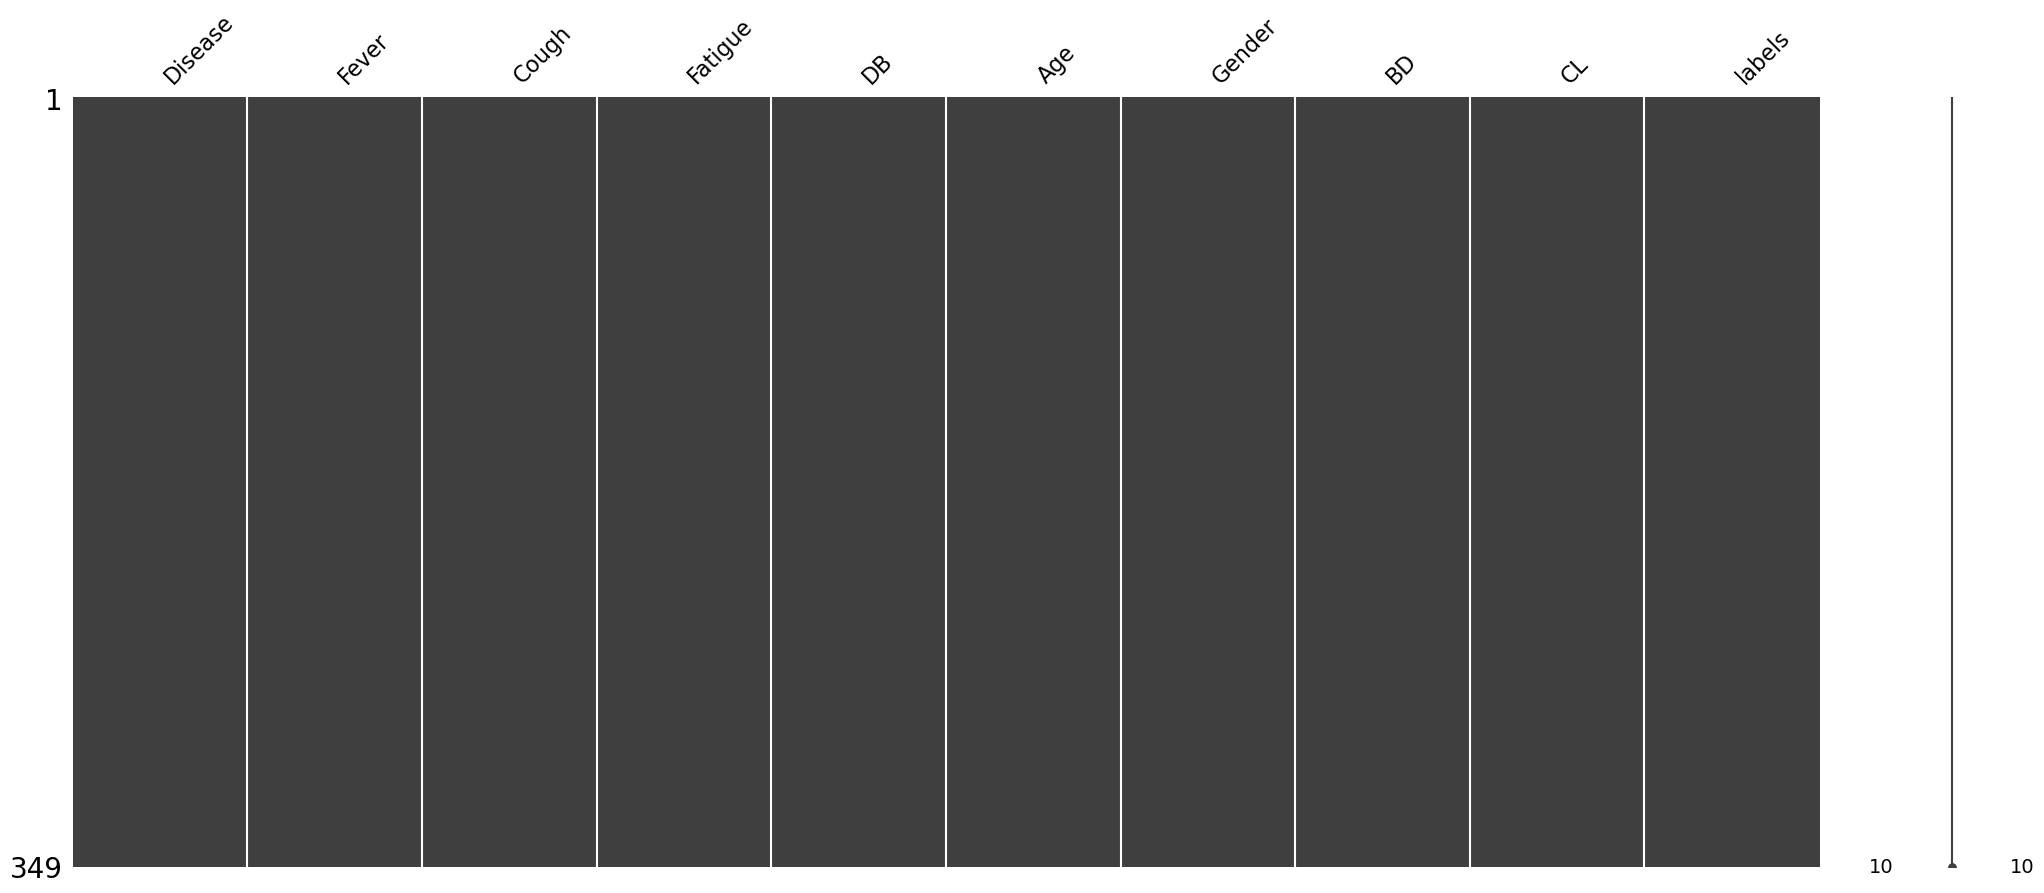

In [17]:
import missingno as msno
msno.matrix(df)

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()

In [20]:
for i in col:
    if i != 'Age':
        df[i]=le.fit_transform(df[i])

In [21]:
df

,Disease,Fever,Cough,Fatigue,DB,Age,Gender,BD,CL,labels
0,56,1,0,1,1,19,0,1,2,1
1,24,0,1,1,0,25,0,2,2,0
2,37,0,1,1,0,25,0,2,2,0
3,6,1,1,0,1,25,1,2,2,1
4,6,1,1,0,1,25,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...
344,101,1,0,1,0,80,0,0,0,1
345,101,1,0,1,0,85,1,0,0,1
346,101,1,0,1,0,85,1,0,0,1
347,101,1,0,1,0,90,0,0,0,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Disease  349 non-null    int64
 1   Fever    349 non-null    int64
 2   Cough    349 non-null    int64
 3   Fatigue  349 non-null    int64
 4   DB       349 non-null    int64
 5   Age      349 non-null    int64
 6   Gender   349 non-null    int64
 7   BD       349 non-null    int64
 8   CL       349 non-null    int64
 9   labels   349 non-null    int64
dtypes: int64(10)
memory usage: 27.4 KB


In [23]:
df.describe()

,Disease,Fever,Cough,Fatigue,DB,Age,Gender,BD,CL,labels
count,349.000000,349.000000,349.000000,349.00000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000
mean,55.326648,0.501433,0.478510,0.69341,0.252149,46.323782,0.495702,0.991404,0.951289,0.532951
std,33.205852,0.500716,0.500255,0.46174,0.434870,13.085090,0.500699,0.975231,0.950154,0.499629
min,0.000000,0.000000,0.000000,0.00000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,0.000000,0.00000,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,0.000000,1.00000,0.000000,45.000000,0.000000,1.000000,1.000000,1.000000
75%,81.000000,1.000000,1.000000,1.00000,1.000000,55.000000,1.000000,2.000000,2.000000,1.000000
max,115.000000,1.000000,1.000000,1.00000,1.000000,90.000000,1.000000,2.000000,2.000000,1.000000


In [24]:
import seaborn as sns

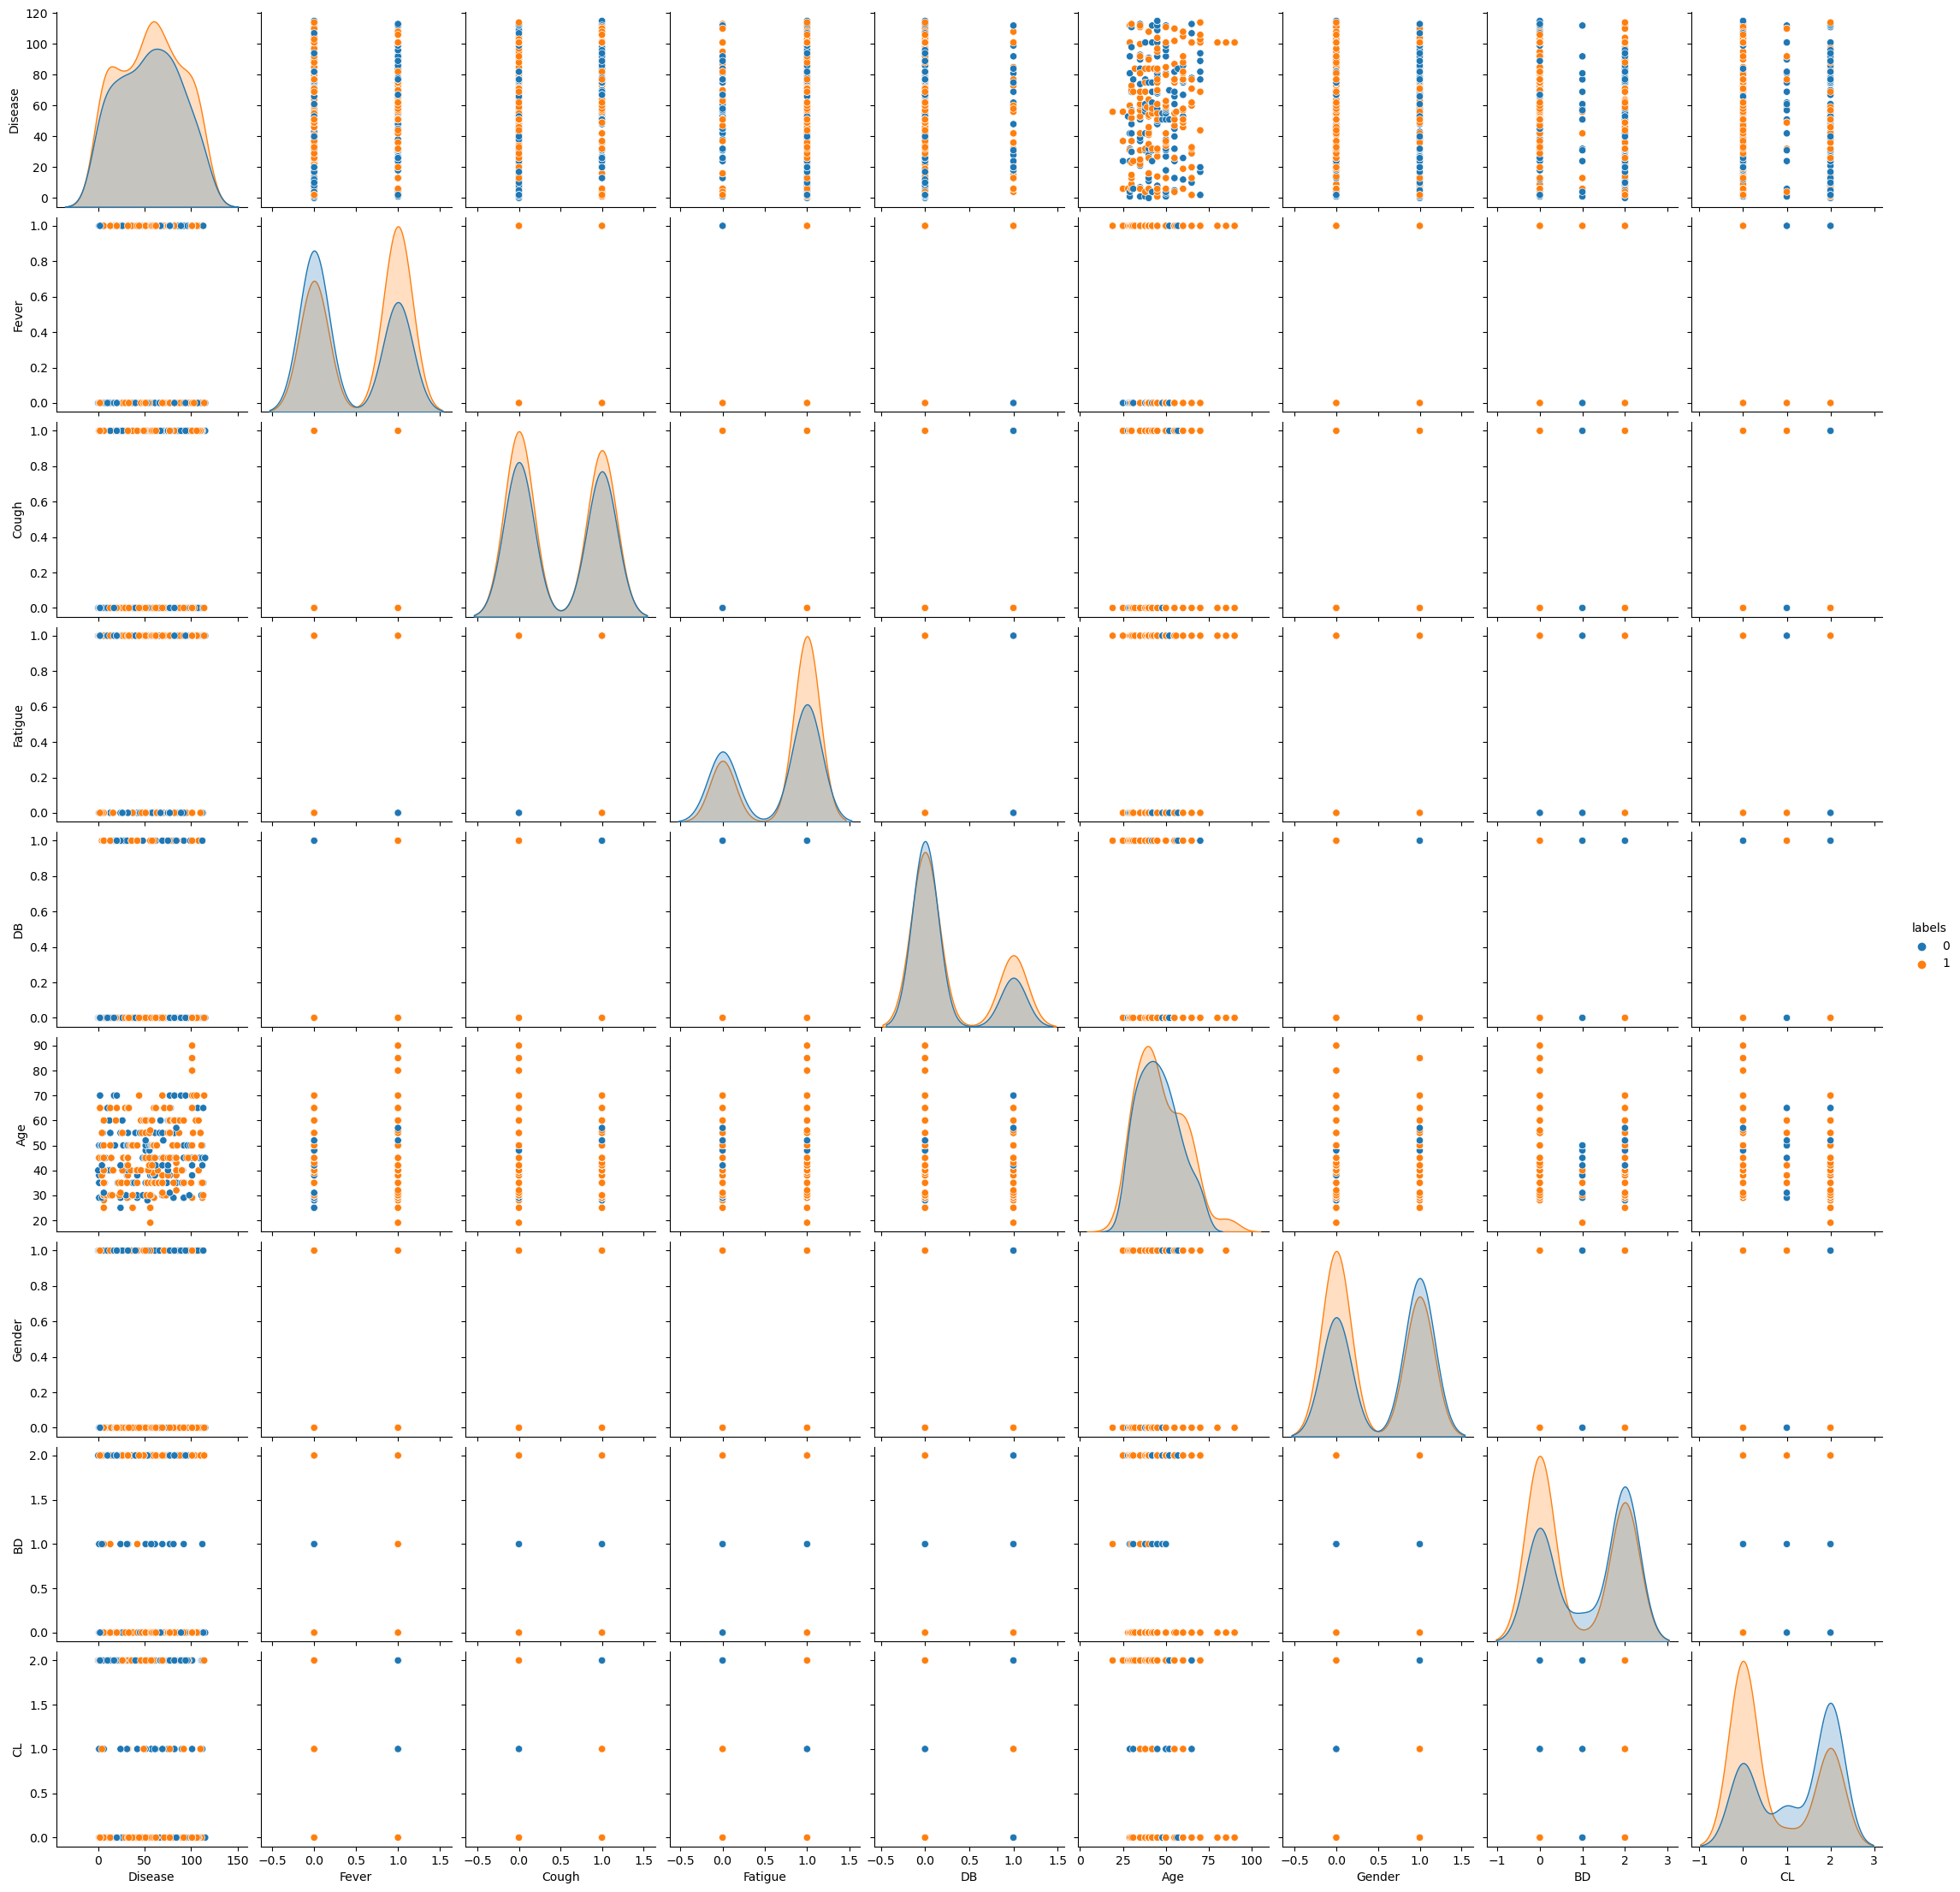

In [25]:
sns.pairplot(df,hue='labels')

Text(0.5, 1.0, 'Gender vs Outcome Variable')

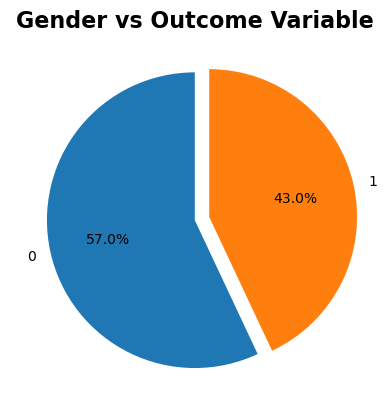

In [26]:
charges_by_Gender = df.groupby("Gender")["labels"].sum()
explode = [0, 0.1]
plt.pie(charges_by_Gender, labels = charges_by_Gender.index, autopct = "%1.1f%%", explode = explode,  startangle = 90)
plt.title("Gender vs Outcome Variable", fontsize = 16, fontweight = "bold")

In [27]:
X=df.drop(columns='labels',axis=1)

In [28]:
X.shape

(349, 9)

In [29]:
X

,Disease,Fever,Cough,Fatigue,DB,Age,Gender,BD,CL
0,56,1,0,1,1,19,0,1,2
1,24,0,1,1,0,25,0,2,2
2,37,0,1,1,0,25,0,2,2
3,6,1,1,0,1,25,1,2,2
4,6,1,1,0,1,25,1,2,2
...,...,...,...,...,...,...,...,...,...
344,101,1,0,1,0,80,0,0,0
345,101,1,0,1,0,85,1,0,0
346,101,1,0,1,0,85,1,0,0
347,101,1,0,1,0,90,0,0,0


In [30]:
Y=df['labels']

In [31]:
Y.shape

(349,)

In [32]:
Y

0      1
1      0
2      0
3      1
4      1
      ..
344    1
345    1
346    1
347    1
348    1
Name: labels, Length: 349, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=2)

In [35]:
X_train.shape

(279, 9)

In [36]:
X_test.shape

(70, 9)

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.fit_transform(X_test)

In [39]:
import tensorflow as tf
tf.random.set_seed(2)
from tensorflow import keras
from keras.layers import Dropout
from keras import regularizers

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [40]:
model=keras.Sequential([
    #keras.layers.Flatten(input_shape=(9,)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(9,)),
    #keras.layers.BatchNormalization(),
    Dropout(0.3),
    keras.layers.Dense(128,activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    #keras.layers.BatchNormalization(),
    Dropout(0.3),
    keras.layers.Dense(64,activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    #keras.layers.BatchNormalization(),
    Dropout(0.3),
    keras.layers.Dense(1,activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))
])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 6

In [42]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
              metrics=['accuracy'])

In [43]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()

In [44]:
history=model.fit(X_train_std,Y_train,validation_split=.1,batch_size=32, verbose = 2, epochs = 20)

Epoch 1/20
8/8 - 2s - loss: 2.5081 - accuracy: 0.5219 - val_loss: 2.3970 - val_accuracy: 0.5714 - 2s/epoch - 208ms/step
Epoch 2/20
8/8 - 0s - loss: 2.3354 - accuracy: 0.5857 - val_loss: 2.2534 - val_accuracy: 0.5357 - 45ms/epoch - 6ms/step
Epoch 3/20
8/8 - 0s - loss: 2.1870 - accuracy: 0.5817 - val_loss: 2.1151 - val_accuracy: 0.5000 - 44ms/epoch - 6ms/step
Epoch 4/20
8/8 - 0s - loss: 2.0533 - accuracy: 0.6056 - val_loss: 1.9871 - val_accuracy: 0.6071 - 45ms/epoch - 6ms/step
Epoch 5/20
8/8 - 0s - loss: 1.9269 - accuracy: 0.6135 - val_loss: 1.8686 - val_accuracy: 0.6429 - 47ms/epoch - 6ms/step
Epoch 6/20
8/8 - 0s - loss: 1.8092 - accuracy: 0.6335 - val_loss: 1.7607 - val_accuracy: 0.6429 - 46ms/epoch - 6ms/step
Epoch 7/20
8/8 - 0s - loss: 1.7122 - accuracy: 0.6335 - val_loss: 1.6557 - val_accuracy: 0.6429 - 47ms/epoch - 6ms/step
Epoch 8/20
8/8 - 0s - loss: 1.6181 - accuracy: 0.6175 - val_loss: 1.5616 - val_accuracy: 0.6429 - 51ms/epoch - 6ms/step
Epoch 9/20
8/8 - 0s - loss: 1.5226 - acc

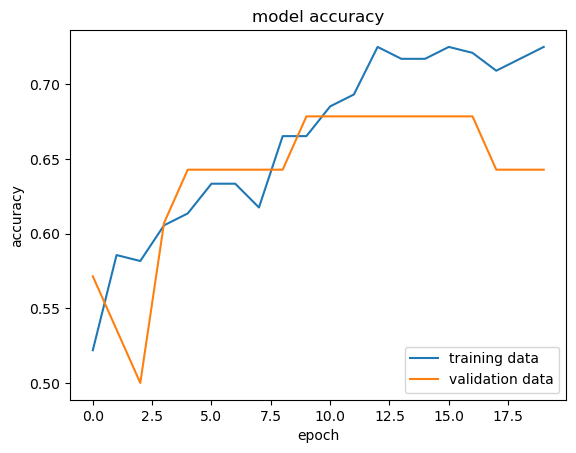

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

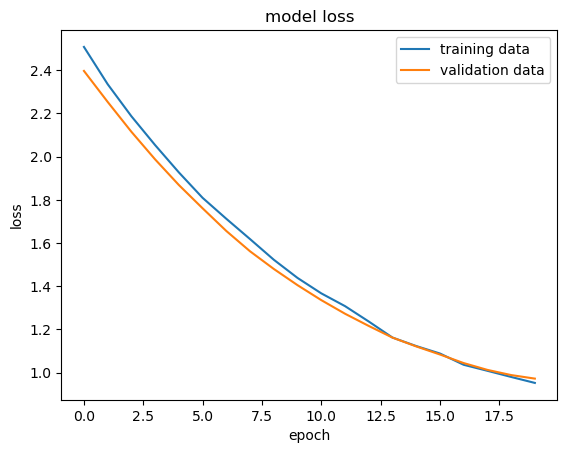

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [47]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)

3/3 [==============================] - 0s 3ms/step - loss: 1.0340 - accuracy: 0.5714
0.5714285969734192


In [48]:
print(X_test_std.shape)
print(X_test_std[0])

(70, 9)
[-0.32917692  1.02899151  0.89155583  0.65465367 -0.56635211 -1.21964464
  1.02899151 -1.13823139 -1.00369346]


In [49]:
Y_pred = model.predict(X_test_std)

3/3 [==============================] - 0s 2ms/step


In [50]:
print(Y_pred.shape)
print(Y_pred[0])

(70, 1)
[0.82902443]


In [51]:
print(X_test_std)

[[-0.32917692  1.02899151  0.89155583  0.65465367 -0.56635211 -1.21964464
   1.02899151 -1.13823139 -1.00369346]
 [-1.51825394  1.02899151 -1.12163475  0.65465367 -0.56635211  0.81309643
   1.02899151  0.90474803  1.12535327]
 [-1.2611562  -0.97182532 -1.12163475  0.65465367  1.765686    0.81309643
   1.02899151 -1.13823139 -1.00369346]
 [ 0.79562566 -0.97182532  0.89155583  0.65465367 -0.56635211  0.81309643
  -0.97182532  0.90474803  1.12535327]
 [-0.32917692  1.02899151  0.89155583  0.65465367  1.765686    0.40654821
  -0.97182532 -1.13823139  1.12535327]
 [-0.74696074 -0.97182532 -1.12163475  0.65465367 -0.56635211  1.62619286
  -0.97182532 -1.13823139 -1.00369346]
 [-1.13260734 -0.97182532 -1.12163475  0.65465367 -0.56635211  2.03274107
   1.02899151  0.90474803  1.12535327]
 [ 0.24929298 -0.97182532 -1.12163475  0.65465367 -0.56635211 -0.81309643
  -0.97182532 -1.13823139 -1.00369346]
 [ 1.02058618  1.02899151  0.89155583  0.65465367  1.765686   -0.81309643
  -0.97182532  0.90474

In [52]:
print(Y_pred)

[[0.82902443]
 [0.5594698 ]
 [0.4175155 ]
 [0.45380282]
 [0.7459711 ]
 [0.7293454 ]
 [0.32571504]
 [0.79120475]
 [0.69794565]
 [0.69794565]
 [0.690364  ]
 [0.5642242 ]
 [0.7496178 ]
 [0.8024817 ]
 [0.71181244]
 [0.7668646 ]
 [0.40389252]
 [0.4084636 ]
 [0.4474674 ]
 [0.4084636 ]
 [0.7641433 ]
 [0.38398284]
 [0.7921505 ]
 [0.78798854]
 [0.5601055 ]
 [0.8110595 ]
 [0.644156  ]
 [0.28869596]
 [0.8110595 ]
 [0.7451253 ]
 [0.5702298 ]
 [0.3634162 ]
 [0.5149358 ]
 [0.7460955 ]
 [0.6945399 ]
 [0.691308  ]
 [0.6584656 ]
 [0.39884135]
 [0.36636233]
 [0.4314573 ]
 [0.6886215 ]
 [0.73365337]
 [0.3044199 ]
 [0.7140178 ]
 [0.47271433]
 [0.50142306]
 [0.68689936]
 [0.29466456]
 [0.5892809 ]
 [0.41816044]
 [0.67093194]
 [0.61896896]
 [0.6334729 ]
 [0.36640623]
 [0.33165535]
 [0.7779064 ]
 [0.6869974 ]
 [0.6057607 ]
 [0.78382176]
 [0.37289968]
 [0.61837244]
 [0.48720115]
 [0.7767942 ]
 [0.7826382 ]
 [0.26545984]
 [0.41891685]
 [0.36564118]
 [0.7686983 ]
 [0.4522898 ]
 [0.5310735 ]]


In [53]:

my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


In [54]:
# converting the prediction probability to class labels

Y_pred_labels = [1 if i>=0.5 else 0 for i in Y_pred]
print(Y_pred_labels)

[1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1]


In [55]:
input_data = (101,1,0,1,0,85,1,0,0)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = 1 if prediction>=.5 else 0
print(prediction_label)

if(prediction_label == 0):
  print('not')

else:
  print('have')

1/1 [==============================] - 0s 21ms/step
[[0.7012561]]
1
have


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [56]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [57]:
print(classification_report(Y_test,Y_pred_labels))

              precision    recall  f1-score   support

           0       0.76      0.44      0.56        43
           1       0.47      0.78      0.58        27

    accuracy                           0.57        70
   macro avg       0.61      0.61      0.57        70
weighted avg       0.65      0.57      0.57        70



In [58]:
print(confusion_matrix(Y_test,Y_pred_labels))

[[19 24]
 [ 6 21]]
